## Типы представления чисел

В питоне различают три типа данных: вещественный (float), целый (int) и комплексный(complex)

In [ ]:
print('type of 1.0 is ', type(1.0))
print('type of 1 is ', type(1))
print('type of 1 + 0j is ', type(complex(1,0)))

В python 2 целые числа могли быть представлены двумя типа: int и long. Диапазоны числа типа int ограничивались машинным представление числа в С. Так, если под целое число в С выделяется 4 байта (c 32-битным типом С long), то максимальное целое число, которое можно представить 32 битами с учетом знака равно:

In [1]:
2**31 - 1 #учтено, что один бит под знак и неотрицательные числа с нуля

2147483647

Целые числа, которые превышали пределы, представлялись типом long. Максимальное число, которое может быть представлено таким типом, ограничивается, по сути, только размером оперативной памяти, то есть может быть очень и очень большим. Но при этом вычисления с использованием чисел типа long медленнее, чем с использованием типа int. В python 3 не делается явного разделения между этими типа и все целые числа называются int 

In [2]:
2**10000

1995063116880758384883742162683585083823496831886192454852008949852943883022194663191996168403619459789933112942320912427155649134941378111759378593209632395785573004679379452676524655126605989552055008691819331154250860846061810468550907486608962488809048989483800925394163325785062156830947390255691238806522509664387444104675987162698545322286853816169431577562964076283688076073222853509164147618395638145896946389941084096053626782106462142733339403652556564953060314268023496940033593431665145929777327966577560617258203140799419817960737824568376228003730288548725190083446458145465055792960141483392161573458813925709537976911927780082695773567444412306201875783632550272832378927071037380286639303142813324140162419567169057406141965434232463880124885614730520743199225961179625013099286024170834080760593232016126849228849625584131284406153673895148711425631511108974551420331382020293164095759646475601040584584156607204496286701651506192063100418642227590867090057460641785695191145605506

Любое вещественное число может быть представлено в виде $x = a\cdot 10^b$, где а - мантисса, b - экспонента. Например, для числа $123.456$ $a = 0.123456, b = 3$. То есть одно вещественное число может быть представлено двумя целыми. Согласно стандарту IEEE-754, вещественные числа представляются в виде $x = a\cdot 2^b$ и при хранении вещественного числа в памяти используется 8 байт, из которых под экспоненту отводится 11 бит (1 бит под знак), а под мантиссу 53 бита (1 бит под знак). Соответственно максимальное вещественное число равняется примерно $10^{308}$.


In [ ]:
print('type of 10.**308 is ', type(10.**308))
10.**308

In [ ]:
print('type of 10.**309 is ', type(10.**309))
10.**309

In [ ]:
print('type of 10**309 is ', type(10**309))
10**309

Особенность,на которую стоит обратить внимание, это представлении вещественного числа в памяти. Рассмотрим следующий пример:

In [ ]:
x = 0.0
#while x < 1.:
while x != 1.0:
    x = x + 0.1
    print ('x =%19.17g' % ( x ))

Из примера видно, что если условие заменить на x != 1.0, то цикл будет бесконечным, так как x никогда не будет равен ровно 1.0

Следующий пример - наглядная демонстрация того, что такое машинный ноль

In [5]:
cnt = 0
epsilon = 1
while 1 + epsilon>1:
    epsilon = epsilon/2
    cnt += 1
print('cnt = ', cnt)
print(epsilon)

cnt =  53
1.1102230246251565e-16


Почему так? Сколько бит выделяется под мантиссу, сколько под показатель степени и знак? Как с этим связано значение cnt?

## Ошибки

Типы ошибок:
1. Ошибка модели
2. Ошибка метода
3. Ошибка входных данных
4. Ошибка округления

Пример 1. Ошибка при использовании ньютоновской механики в релятивистском пределе. Уравнения Эйлера и уравнения Н-С для моделирования течений сплошных сред.

Пример 2. Формула направленной разности для вычисления первой производной, получение для нее ошибки метода (порядок точности метода). Где там может быть ошибка входных данных?

На следующем примере продемонстрируем влияние ошибки округления на точность вычислений. Будем численно искать производную.

In [ ]:
# Приближенное вычисление производной 
y = lambda x: x**3.5 # так можно задать функцию одного аргумента f(x) = x**3.5
dydx = lambda x: 3.5 * x**2.5
x_0 = 2

dydx_ex = dydx(x_0)

h = 1e-10
dydx_ap_1 = (y(x_0 + h) - y(x_0)) / h
h = 1e-12
dydx_ap_2 = (y(x_0 + h) - y(x_0)) / h
# С уменьшением шага ошибка резко увеличивается!
print('dydx_ex - dydx_ap_1 =', dydx_ex - dydx_ap_1)
print('dydx_ex - dydx_ap_2 =', dydx_ex - dydx_ap_2)

Оценка ошибки округления для вычислений производной по формуле направленной разности. Получение оптимального шага дифференцирования в этом случае. 

$\tilde f = f(1+\epsilon)$ - отличие представления числа от его реального значения на машинное эпсилон

$f' \approx \frac{f_1(1+\epsilon_1) - f_0(1+\epsilon_2)}{h}$. Отсюда $\epsilon_{trunc} \le \frac{2\max(f_0, f_1)\epsilon}{h}$

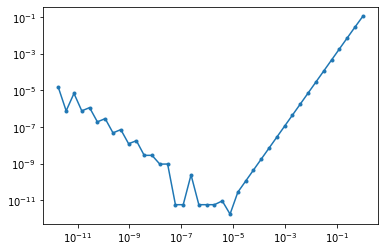

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
f = lambda x: np.sin(x)
df = lambda x: np.cos(x)

x0 = np.pi/4
N = 40
df_ap = np.zeros(N) 
h = np.zeros(N)
err = np.zeros(N)
for k in range(0, N):
    h[k] = 1 / 2**k
    df_ap[k] = (f(x0 + h[k]) - f(x0 - h[k])) / (2 * h[k])
    err[k] = np.abs(df_ap[k] - df(x0))

fig = plt.figure()
ax = fig.gca()
ax.plot(h, err,'.-')
ax.set_yscale('log')
ax.set_xscale('log')